<a href="https://colab.research.google.com/github/trypa11/Rubiks-Cube-A-/blob/main/TN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Data

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=4000)

word_index = tf.keras.datasets.imdb.get_word_index()
index2word = dict((i + 3, word) for (word, i) in word_index.items())
index2word[0] = '[pad]'
index2word[1] = '[bos]'
index2word[2] = '[oov]'
x_train = np.array([' '.join([index2word[idx] for idx in text]) for text in x_train])
x_test = np.array([' '.join([index2word[idx] for idx in text]) for text in x_test])

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
len(word_index)

88584

In [ ]:
x_train[0]

"[bos] this film was just brilliant casting location scenery story direction [oov] really suited the part they played and you could just imagine being there robert [oov] is an amazing actor and now the same being director [oov] father came from the same [oov] island as myself so i loved the fact there was a real connection with this film the witty [oov] throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for [oov] and would recommend it to everyone to watch and the fly [oov] was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also [oov] to the two little [oov] that played the [oov] of norman and paul they were just brilliant children are often left out of the [oov] list i think because the stars that play them all grown up are such a big [oov] for the whole film but these children are amazing and should be [oov] for what they have done 

In [ ]:
vocabulary = list()
for text in x_train:
  tokens = text.split()
  vocabulary.extend(tokens)

vocabulary = set(vocabulary)
print(len(vocabulary))

3998


In [ ]:
from tqdm import tqdm

x_train_binary = list()
x_test_binary = list()

for text in tqdm(x_train):
  tokens = text.split()
  binary_vector = list()
  for vocab_token in vocabulary:
    if vocab_token in tokens:
      binary_vector.append(1)
    else:
      binary_vector.append(0)
  x_train_binary.append(binary_vector)

x_train_binary = np.array(x_train_binary)

for text in tqdm(x_test):
  tokens = text.split()
  binary_vector = list()
  for vocab_token in vocabulary:
    if vocab_token in tokens:
      binary_vector.append(1)
    else:
      binary_vector.append(0)
  x_test_binary.append(binary_vector)

x_test_binary = np.array(x_test_binary)

100%|██████████| 25000/25000 [06:59<00:00, 59.66it/s]


##Class BernoulliNaiveBayes

In [ ]:
class BernoulliNaiveBayes:
    def __init__(self):
        self.classes = None
        self.likelihoods = None
        self.p_of_class = None

    def fit(self, X, y):
        n_reviews, n_words = X.shape
        self.classes = np.unique(y) #classes=[0(neg),1(pos)]
        n_classes = len(self.classes)

        self.p_of_class = np.zeros(n_classes)
        self.likelihoods = np.zeros((n_classes, n_words))

        for c in self.classes:
            X_c = X[y == c]
            self.p_of_class[c] = X_c.shape[0] / float(n_reviews) #p_of_class=[P(neg)=1/2,P(pos)=1/2]
            for f in range(n_words):
                word_count = X_c[:, f].sum() #Syxnothta kathe word se ola ta reviews ana kathgoria neg/pos
                self.likelihoods[c, f] = (word_count + 1) / (X_c.shape[0] + 2)#Pithanothtes kathe word gia neg kai pos xrhshmopoiwntas ektimhtria Laplace

    def predict(self, X):
        n_reviews, _ = X.shape
        y_pred = np.zeros(n_reviews)
        for i in range(n_reviews):
            finals = []
            for c in self.classes:
                plog= np.log(self.p_of_class[c])#log(P(c))
                likelihood = np.sum(np.log(self.likelihoods[c, X[i] == 1])) # Sum pithanothtwn ton words tou review
                final = plog + likelihood
                finals.append(final)
            y_pred[i] = self.classes[np.argmax(finals)]
        return y_pred

In [ ]:
b = BernoulliNaiveBayes()
b.fit(x_train_binary, y_train)
from sklearn.metrics import classification_report
print(classification_report(y_test, b.predict(x_test_binary)))


              precision    recall  f1-score   support

           0       0.79      0.90      0.84     12500
           1       0.88      0.76      0.82     12500

    accuracy                           0.83     25000
   macro avg       0.84      0.83      0.83     25000
weighted avg       0.84      0.83      0.83     25000



Dev var

In [ ]:
from sklearn.model_selection import train_test_split
# split rest of the train data into train and dev
x_train_binary, x_dev_binary, y_train, y_dev = train_test_split(x_train_binary, y_train,
                                                                test_size=0.3)

Diagram

(3500, 3998)
(3500,)
(7000, 3998)
(7000,)
(10500, 3998)
(10500,)
(14000, 3998)
(14000,)
(17500, 3998)
(17500,)


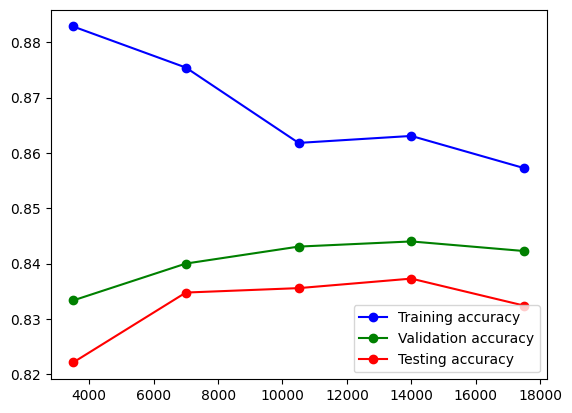

In [ ]:
from sklearn.metrics import accuracy_score
def custom_learning_curve(x_train, y_train,
                          x_val, y_val, x_test, y_test,
                          n_splits):

  split_size = int(len(x_train) / n_splits)
  x_splits = np.split(x_train, n_splits) # must be equal division
  y_splits = np.split(y_train, n_splits)
  train_accuracies = list()
  val_accuracies = list()
  test_accuracies = list()
  curr_x = x_splits[0]
  print(curr_x.shape)
  curr_y = y_splits[0]
  print(curr_y.shape)
  b = BernoulliNaiveBayes()
  b.fit(curr_x, curr_y)
  train_accuracies.append(accuracy_score(curr_y,
                                         b.predict(curr_x)))

  val_accuracies.append(accuracy_score(y_val, b.predict(x_val)))
  test_accuracies.append(accuracy_score(y_test, b.predict(x_test)))

  for i in range(1, len(x_splits)):
    b = BernoulliNaiveBayes()
    curr_x = np.concatenate((curr_x, x_splits[i]), axis=0)
    print(curr_x.shape)
    curr_y = np.concatenate((curr_y, y_splits[i]), axis=0)
    print(curr_y.shape)
    b.fit(curr_x, curr_y)

    train_accuracies.append(accuracy_score(curr_y,
                                           b.predict(curr_x)))

    val_accuracies.append(accuracy_score(y_val, b.predict(x_val)))

    test_accuracies.append(accuracy_score(y_test, b.predict(x_test)))

  plt.plot(list(range(split_size, len(x_train) + split_size,
                      split_size)), train_accuracies, 'o-', color="b",
             label="Training accuracy")
  plt.plot(list(range(split_size, len(x_train) + split_size,
                      split_size)), val_accuracies, 'o-', color="green",
           label="Validation accuracy")
  plt.plot(list(range(split_size, len(x_train) + split_size,
                      split_size)), test_accuracies, 'o-', color="red",
           label="Testing accuracy")
  plt.legend(loc="lower right")
  plt.show()

custom_learning_curve(x_train=x_train_binary , y_train=y_train,
                      x_val=x_dev_binary, y_val=y_dev, x_test=x_test_binary,
                      y_test=y_test, n_splits=5)

## BernoulliNB from sklearn


In [ ]:
from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB()
nb.fit(x_train_binary, y_train)


print(classification_report(y_test, nb.predict(x_test_binary)))

Curves

In [ ]:
from sklearn.metrics import accuracy_score
def custom_learning_curve(x_train, y_train,
                          x_val, y_val, x_test, y_test,
                          n_splits):

  split_size = int(len(x_train) / n_splits)
  x_splits = np.split(x_train, n_splits) # must be equal division
  y_splits = np.split(y_train, n_splits)
  train_accuracies = list()
  val_accuracies = list()
  test_accuracies = list()
  curr_x = x_splits[0]
  print(curr_x.shape)
  curr_y = y_splits[0]
  print(curr_y.shape)
  nb = BernoulliNB()
  nb.fit(curr_x, curr_y)
  train_accuracies.append(accuracy_score(curr_y,
                                         nb.predict(curr_x)))

  val_accuracies.append(accuracy_score(y_val, nb.predict(x_val)))
  test_accuracies.append(accuracy_score(y_test, nb.predict(x_test)))

  for i in range(1, len(x_splits)):
    nb = BernoulliNB()
    curr_x = np.concatenate((curr_x, x_splits[i]), axis=0)
    print(curr_x.shape)
    curr_y = np.concatenate((curr_y, y_splits[i]), axis=0)
    print(curr_y.shape)
    nb.fit(curr_x, curr_y)

    train_accuracies.append(accuracy_score(curr_y,
                                           nb.predict(curr_x)))

    val_accuracies.append(accuracy_score(y_val, nb.predict(x_val)))

    test_accuracies.append(accuracy_score(y_test, nb.predict(x_test)))

  plt.plot(list(range(split_size, len(x_train) + split_size,
                      split_size)), train_accuracies, 'o-', color="b",
             label="Training accuracy")
  plt.plot(list(range(split_size, len(x_train) + split_size,
                      split_size)), val_accuracies, 'o-', color="green",
           label="Validation accuracy")
  plt.plot(list(range(split_size, len(x_train) + split_size,
                      split_size)), test_accuracies, 'o-', color="red",
           label="Testing accuracy")
  plt.legend(loc="lower right")
  plt.show()

custom_learning_curve(x_train=x_train_binary , y_train=y_train,
                      x_val=x_dev_binary, y_val=y_dev, x_test=x_test_binary,
                      y_test=y_test, n_splits=5)

##Class Logistic Regression Stochastic Gradient Ascent with λ Regularization

In [ ]:
class LogisticRegressionSGA:
    def __init__(self, h=0.1, max_iter=200,lamb=0.1):
        self.h = h
        self.max_iter = max_iter
        self.lamb=lamb

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])#vector w
        for i in range(self.max_iter):
            z = np.dot(X, self.w)#w*x
            y_pred = self.sigmoid(z)#P(c|x+) with sigmoid
            gradient = np.mean((y-y_pred)*X.T, axis=1)+(self.lamb * self.w *2)#calculate ∇l(w)+ regularization L1
            self.w += self.h * gradient #η*∇l(w) and we add(+) w because is an Ascent

    def predict(self, X):
        predictions = []
        for x in X:
            y_pred = self.sigmoid(np.dot(x, self.w))
            predictions.append(1 if y_pred >= 0.5 else 0)
        return predictions

Curve

In [ ]:
from sklearn.metrics import accuracy_score
def custom_learning_curve(x_train, y_train,
                          x_val, y_val, x_test, y_test,
                          n_splits):

  split_size = int(len(x_train) / n_splits)
  x_splits = np.split(x_train, n_splits) # must be equal division
  y_splits = np.split(y_train, n_splits)
  train_accuracies = list()
  val_accuracies = list()
  test_accuracies = list()
  curr_x = x_splits[0]
  print(curr_x.shape)
  curr_y = y_splits[0]
  print(curr_y.shape)
  lsga =  LogisticRegressionSGA()
  lsga.fit(curr_x, curr_y)
  train_accuracies.append(accuracy_score(curr_y,
                                         lsga.predict(curr_x)))

  val_accuracies.append(accuracy_score(y_val, lsga.predict(x_val)))
  test_accuracies.append(accuracy_score(y_test, lsga.predict(x_test)))

  for i in range(1, len(x_splits)):
    lsga =  LogisticRegressionSGA()
    curr_x = np.concatenate((curr_x, x_splits[i]), axis=0)
    print(curr_x.shape)
    curr_y = np.concatenate((curr_y, y_splits[i]), axis=0)
    print(curr_y.shape)
    lsga.fit(curr_x, curr_y)

    train_accuracies.append(accuracy_score(curr_y,
                                           lsga.predict(curr_x)))

    val_accuracies.append(accuracy_score(y_val, lsga.predict(x_val)))

    test_accuracies.append(accuracy_score(y_test, lsga.predict(x_test)))

  plt.plot(list(range(split_size, len(x_train) + split_size,
                      split_size)), train_accuracies, 'o-', color="b",
             label="Training accuracy")
  plt.plot(list(range(split_size, len(x_train) + split_size,
                      split_size)), val_accuracies, 'o-', color="green",
           label="Validation accuracy")
  plt.plot(list(range(split_size, len(x_train) + split_size,
                      split_size)), test_accuracies, 'o-', color="red",
           label="Testing accuracy")
  plt.legend(loc="lower right")
  plt.show()

custom_learning_curve(x_train=x_train_binary , y_train=y_train,
                      x_val=x_dev_binary, y_val=y_dev, x_test=x_test_binary,
                      y_test=y_test, n_splits=5)

Metrics

In [ ]:
lsga = LogisticRegressionSGA()
lsga.fit(x_train_binary, y_train)
from sklearn.metrics import classification_report
print(classification_report(y_test, lsga.predict(x_test_binary)))

##Logistic regression Sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(solver='saga',max_iter=200)
log.fit(x_train_binary, y_train)

print(classification_report(y_test, log.predict(x_test_binary)))

In [ ]:
from sklearn.metrics import accuracy_score
def custom_learning_curve(x_train, y_train,
                          x_val, y_val, x_test, y_test,
                          n_splits):

  split_size = int(len(x_train) / n_splits)
  x_splits = np.split(x_train, n_splits) # must be equal division
  y_splits = np.split(y_train, n_splits)
  train_accuracies = list()
  val_accuracies = list()
  test_accuracies = list()
  curr_x = x_splits[0]
  print(curr_x.shape)
  curr_y = y_splits[0]
  print(curr_y.shape)
  log = LogisticRegression(solver='saga',max_iter=200)
  log.fit(curr_x, curr_y)
  train_accuracies.append(accuracy_score(curr_y,
                                         log.predict(curr_x)))

  val_accuracies.append(accuracy_score(y_val, log.predict(x_val)))
  test_accuracies.append(accuracy_score(y_test, log.predict(x_test)))

  for i in range(1, len(x_splits)):
    log = LogisticRegression(solver='saga',max_iter=200)
    curr_x = np.concatenate((curr_x, x_splits[i]), axis=0)
    print(curr_x.shape)
    curr_y = np.concatenate((curr_y, y_splits[i]), axis=0)
    print(curr_y.shape)
    log.fit(curr_x, curr_y)

    train_accuracies.append(accuracy_score(curr_y,
                                           log.predict(curr_x)))

    val_accuracies.append(accuracy_score(y_val, log.predict(x_val)))

    test_accuracies.append(accuracy_score(y_test, log.predict(x_test)))

  plt.plot(list(range(split_size, len(x_train) + split_size,
                      split_size)), train_accuracies, 'o-', color="b",
             label="Training accuracy")
  plt.plot(list(range(split_size, len(x_train) + split_size,
                      split_size)), val_accuracies, 'o-', color="green",
           label="Validation accuracy")
  plt.plot(list(range(split_size, len(x_train) + split_size,
                      split_size)), test_accuracies, 'o-', color="red",
           label="Testing accuracy")
  plt.legend(loc="lower right")
  plt.show()

custom_learning_curve(x_train=x_train_binary , y_train=y_train,
                      x_val=x_dev_binary, y_val=y_dev, x_test=x_test_binary,
                      y_test=y_test, n_splits=5)

## Part C

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

imdb_mlp = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(3998,)),
      tf.keras.layers.Dense(units=256, activation='relu'),
      tf.keras.layers.Dropout(rate=0.2),
      tf.keras.layers.Dense(units=128, activation='relu'),
      tf.keras.layers.Dense(units=64, activation='relu'),
      tf.keras.layers.Dropout(rate=0.5),
      tf.keras.layers.Dense(units=1, activation='sigmoid')
])

plot_model(imdb_mlp, to_file='model.png', show_shapes=True)
Image('model.png')

In [ ]:
imdb_mlp.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.SGD(),
                  metrics=['binary_accuracy'])
imdb_mlp.fit(x=x_train_binary, y=y_train,
             epochs=10, verbose=1, batch_size=32)

In [ ]:
print(imdb_mlp.evaluate(x_test_binary, y_test))

In [ ]:
imdb_mlp.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy'], optimizer=tf.keras.optimizers.SGD())


In [ ]:
mlp_history = imdb_mlp.fit(x_train_binary, y_train, batch_size=32,
                                  epochs=10, validation_split=0.2)

In [ ]:
def plot(his, kind):
  train = his.history[kind]
  val = his.history["val_"+  kind]
  epochs = range(1, len(train)+1)
  plt.figure(figsize=(12,9))
  plt.plot(epochs, train, 'b', label='Training ' + kind)
  plt.plot(epochs, val, 'orange', label='Validation ' + kind)
  plt.title('Training and validation ' + kind)
  plt.xlabel('Epochs')
  plt.ylabel(kind)
  # x1, x2, y1, y2 = plt.axis()
  # plt.axis((x1, x2, 0, 0.2))
  plt.legend()
  plt.show()

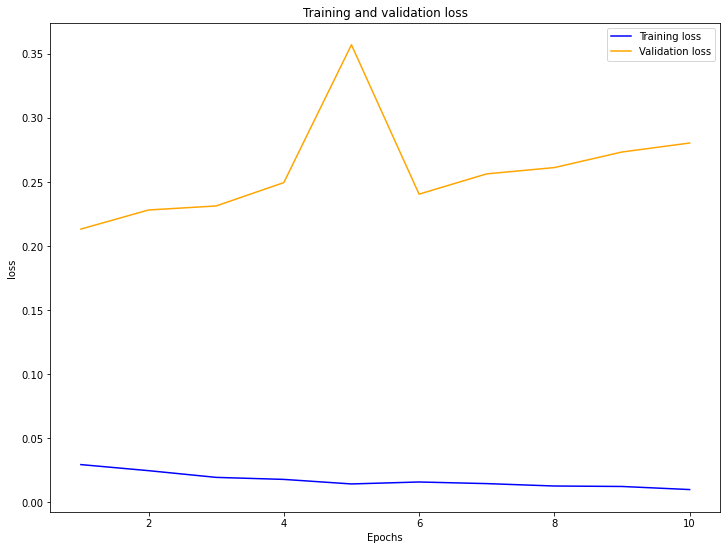

In [ ]:
plot(mlp_history, 'loss')

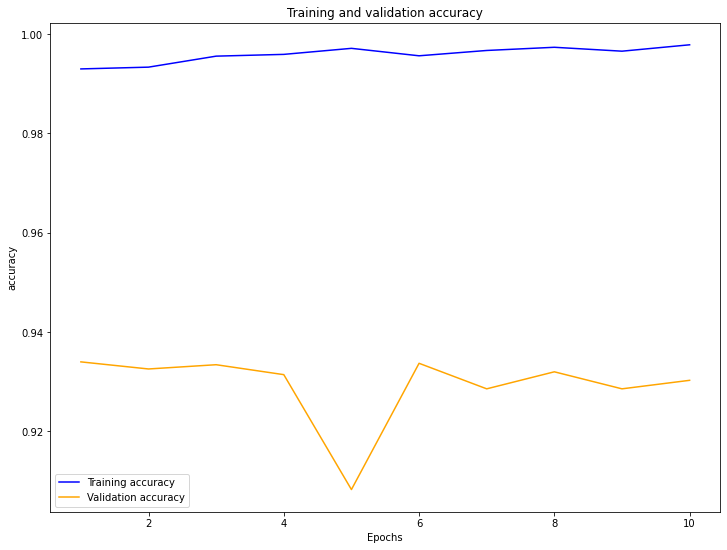

In [ ]:
plot(mlp_history, 'accuracy')

In [ ]:
y_pred = imdb_mlp.predict(x_test_binary)


print(classification_report(y_test, y_pred.round()))

782/782 [==============================] - 6s 8ms/step
              precision    recall  f1-score   support

           0       0.87      0.86      0.86     12500
           1       0.86      0.87      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000

